In [425]:
from linmix import linmix
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, ks_2samp
import random

from Cumulative_spectral_indices import flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, ricci_taurus_fluxes_1mm, spectral_indices_taurus, flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, flux_lupus_1_mm, tazzari_lupus_spectral_indices

xsig = [0] * 99
ysig = [0] * 99

In [401]:
class region_data():
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

lupus_data = region_data()
taurus_data = region_data()
ophiucus_data = region_data()
upper_sco_data = region_data()
total_sample_data = region_data()

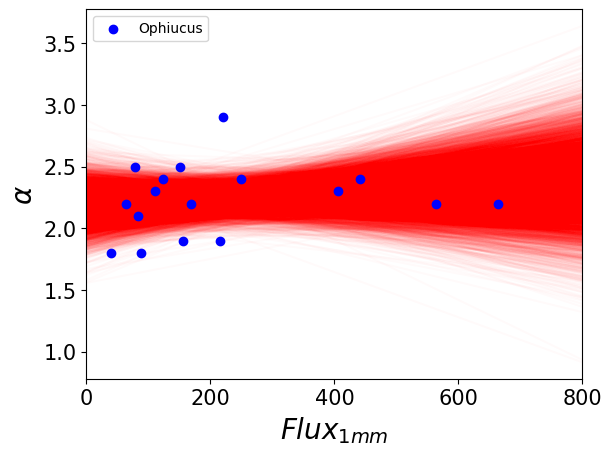

In [402]:
fig, ax = plt.subplots()

lm = linmix.LinMix(flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, xsig[:len(flux_list_ophiucus_ricci_1mm)], ysig[:len(flux_list_ophiucus_ricci_1mm)], K=2)
lm.run_mcmc(silent=True)

ophiucus_slope_flux_alpha = []
ophiucus_y_intercept_flux_alpha = []
ophiucus_scatter = []

xmin = 0
xmax = 800
xs = np.arange(xmin,xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    ophiucus_slope_flux_alpha.append(lm.chain[i]['beta'])
    ophiucus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    ophiucus_scatter.append(lm.chain[i]['sigsqr'])

plt.scatter(flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, label='Ophiucus', color='b', zorder=1)


plt.xlabel('$Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.legend()
plt.xlim(xmin, xmax)
ax.tick_params(which='both', labelsize=15)
plt.show()

/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_27452/2367153703.py:24: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(xmin, xmax)


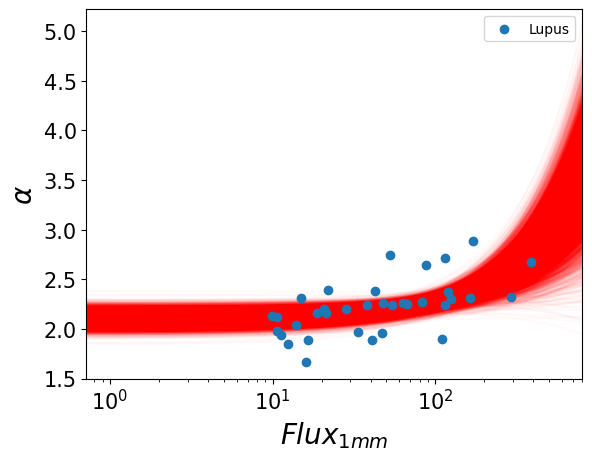

In [403]:
fig, ax = plt.subplots()

lm = linmix.LinMix(flux_lupus_1_mm, tazzari_lupus_spectral_indices, xsig[:len(flux_lupus_1_mm)], ysig[:len(flux_lupus_1_mm)], K=2)
lm.run_mcmc(silent=True)

lupus_slope_flux_alpha = []
lupus_y_intercept_flux_alpha = []
lupus_scatter = []

xs = np.arange(xmin, xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    lupus_slope_flux_alpha.append(lm.chain[i]['beta'])
    lupus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    lupus_scatter.append(lm.chain[i]['sigsqr'])


plt.scatter(flux_lupus_1_mm, tazzari_lupus_spectral_indices, label='Lupus', zorder=1)

plt.xlabel('$Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.legend()
plt.xscale('log')
plt.xlim(xmin, xmax)
ax.tick_params(which='both', labelsize=15)
plt.show()

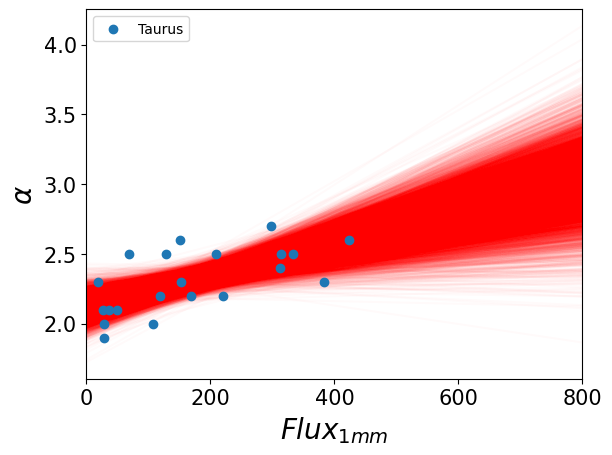

In [404]:
fig, ax = plt.subplots()

lm = linmix.LinMix(ricci_taurus_fluxes_1mm, spectral_indices_taurus, xsig[:len(ricci_taurus_fluxes_1mm)], ysig[:len(ricci_taurus_fluxes_1mm)], K=2)
lm.run_mcmc(silent=True)

taurus_slope_flux_alpha = []
taurus_y_intercept_flux_alpha = []
taurus_scatter =[]

xs = np.arange(xmin, xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    taurus_slope_flux_alpha.append(lm.chain[i]['beta'])
    taurus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    taurus_scatter.append(lm.chain[i]['sigsqr'])


plt.scatter(ricci_taurus_fluxes_1mm, spectral_indices_taurus, label='Taurus', zorder=1)

plt.xlabel('$Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.legend()
plt.xlim(xmin, xmax)
ax.tick_params(which='both', labelsize=15)
plt.show()

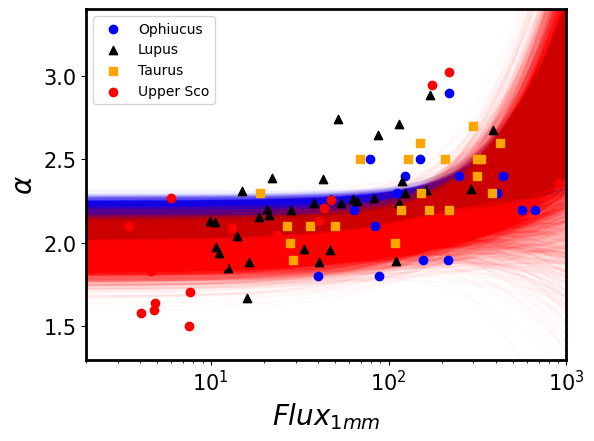

In [405]:
fig, ax = plt.subplots()

# set thickness axis
plt.setp(ax.spines.values(), linewidth=2)

# avoid axis labels being cut
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)

total_fluxes = ricci_taurus_fluxes_1mm + flux_lupus_1_mm + flux_list_ophiucus_ricci_1mm
total_spectra_indices = spectral_indices_taurus + tazzari_lupus_spectral_indices + spectral_index_ophiucus

xsig = [0] * 100
ysig = [0] * 100
lm = linmix.LinMix(total_fluxes, total_spectra_indices, xsig[:len(total_fluxes)], ysig[:len(total_fluxes)], K=2)
lm.run_mcmc(silent=True)

total_sample_slope_flux_alpha = []
total_sample_y_intercept_flux_alpha = []
scatter_total_sample = []

xs = np.arange(2, 1000)
for i in range(0, 10000):
    total_sample_slope_flux_alpha.append(lm.chain[i]['beta'])
    total_sample_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='b', alpha=0.02, zorder=0)
    scatter_total_sample.append(lm.chain[i]['sigsqr'])


lm = linmix.LinMix(flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, xsig[:len(flux_barenfeld_0_88mm_updated)], ysig[:len(flux_barenfeld_0_88mm_updated)], K=2)
lm.run_mcmc(silent=True)

upper_sco_slope_flux_alpha = []
upper_sco_y_intercept_flux_alpha = []
scatter_upper_sco = []

xs = np.arange(2, 1000)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    upper_sco_slope_flux_alpha.append(lm.chain[i]['beta'])
    upper_sco_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    scatter_upper_sco.append(lm.chain[i]['sigsqr'])

plt.scatter(flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, label='Ophiucus', color='blue', zorder=1)
plt.scatter(flux_lupus_1_mm, tazzari_lupus_spectral_indices, label='Lupus', marker='^', color='black', zorder=1)
plt.scatter(ricci_taurus_fluxes_1mm, spectral_indices_taurus, label='Taurus', marker='s', color='orange', zorder=1)
plt.scatter(flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, label='Upper Sco', color='red', zorder=1)
plt.xticks(np.array(np.arange(1.4, 3.1, 0.1)))

plt.xlabel('$Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.xscale('log')
plt.legend()
plt.xlim(2, 1000), plt.ylim(1.3, 3.4)
ax.tick_params(which='both', labelsize=15)
plt.show()

# Histograms

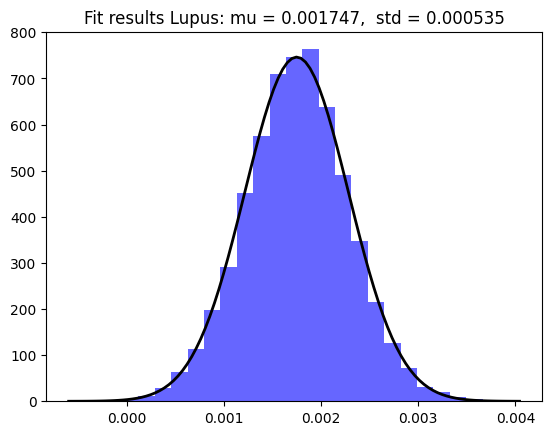

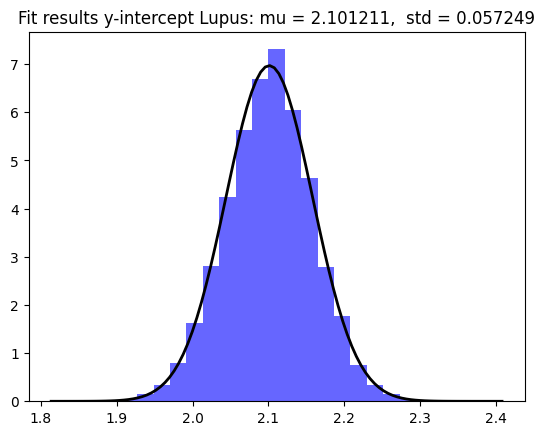

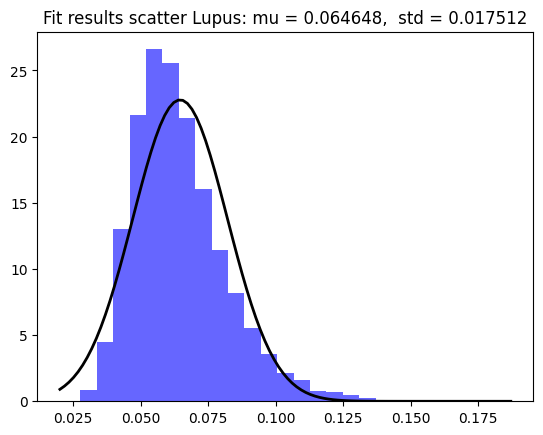

In [406]:
lupus_data.slope_mu, lupus_data.slope_std = norm.fit(lupus_slope_flux_alpha)
# Plot the histogram.
plt.hist(lupus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.slope_mu, lupus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results Lupus: mu = %.6f,  std = %.6f" % (lupus_data.slope_mu, lupus_data.slope_std)
plt.title(title)
plt.show()

lupus_data.y_intercept_mu, lupus_data.y_intercept_std = norm.fit(lupus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(lupus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Lupus: mu = %.6f,  std = %.6f" % (lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.title(title)
plt.show()

lupus_scatter_mu, lupus_scatter_std = norm.fit(lupus_scatter)
# Plot the histogram.
plt.hist(lupus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_scatter_mu, lupus_scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Lupus: mu = %.6f,  std = %.6f" % (lupus_scatter_mu, lupus_scatter_std)
plt.title(title)
plt.show()

### Ophiucus

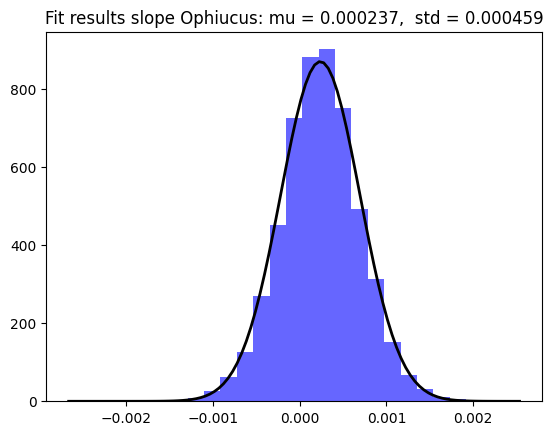

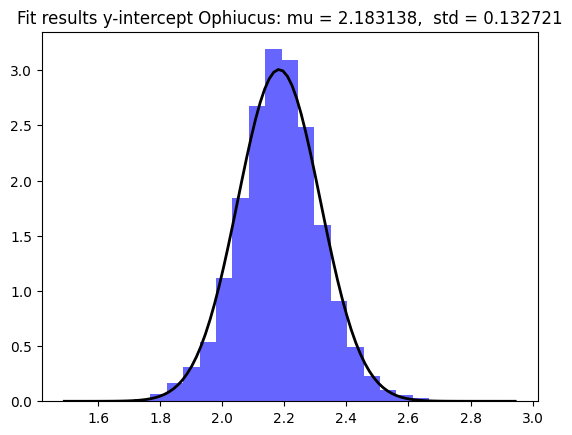

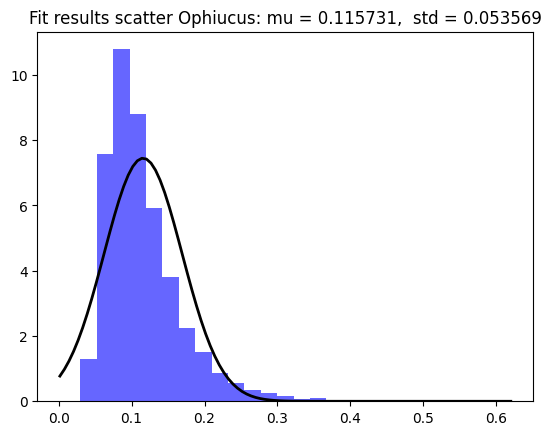

In [407]:
ophiucus_data.slope_mu, ophiucus_data.slope_std = norm.fit(ophiucus_slope_flux_alpha)
# Plot the histogram.
plt.hist(ophiucus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results slope Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.title(title)
plt.show()

ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std = norm.fit(ophiucus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(ophiucus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.title(title)
plt.show()

ophiucus_data.scatter_mu, ophiucus_data.scatter_std = norm.fit(ophiucus_scatter)
_std = norm.fit(ophiucus_scatter)
# Plot the histogram.
plt.hist(ophiucus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.scatter_mu, ophiucus_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.scatter_mu, ophiucus_data.scatter_std)
plt.title(title)
plt.show()

### Taurus

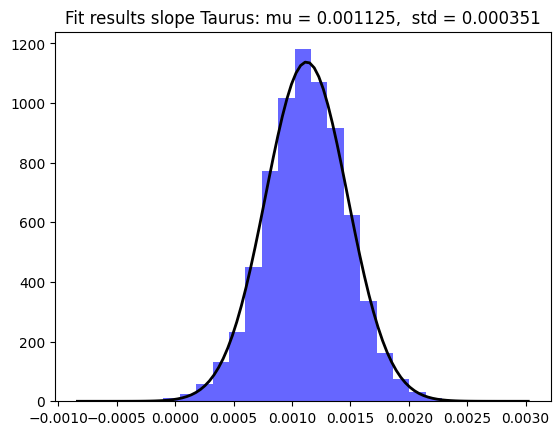

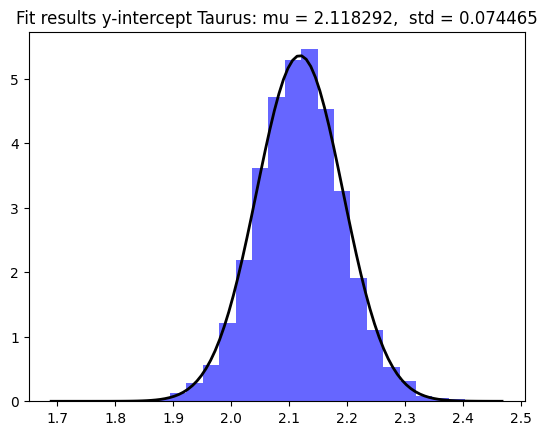

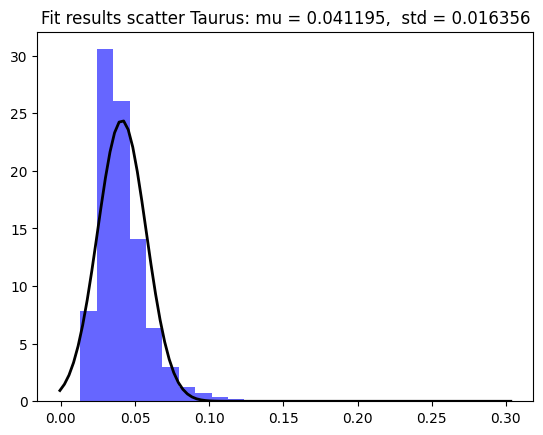

In [408]:
taurus_data.slope_mu, taurus_data.slope_std = norm.fit(taurus_slope_flux_alpha)
# Plot the histogram.
plt.hist(taurus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.slope_mu, taurus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results slope Taurus: mu = %.6f,  std = %.6f" % (taurus_data.slope_mu, taurus_data.slope_std)
plt.title(title)
plt.show()

taurus_data.y_intercept_mu, taurus_data.y_intercept_std = norm.fit(taurus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(taurus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Taurus: mu = %.6f,  std = %.6f" % (taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.title(title)
plt.show()

taurus_data.scatter_mu, taurus_data.scatter_std = norm.fit(taurus_scatter)
# Plot the histogram.
plt.hist(taurus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.scatter_mu, taurus_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Taurus: mu = %.6f,  std = %.6f" % (taurus_data.scatter_mu, taurus_data.scatter_std)
plt.title(title)
plt.show()

### Total Sample

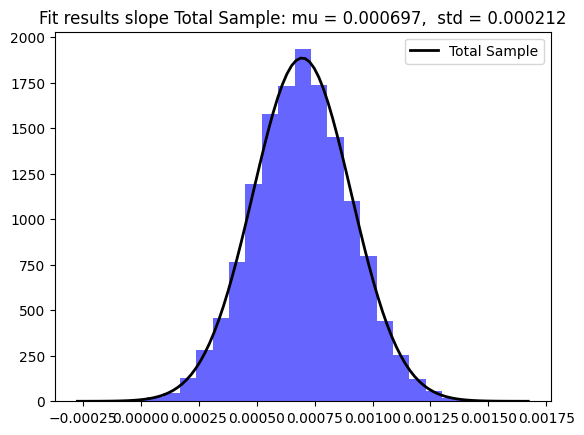

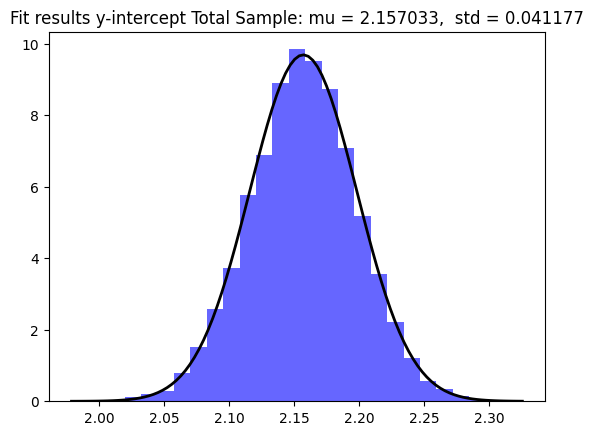

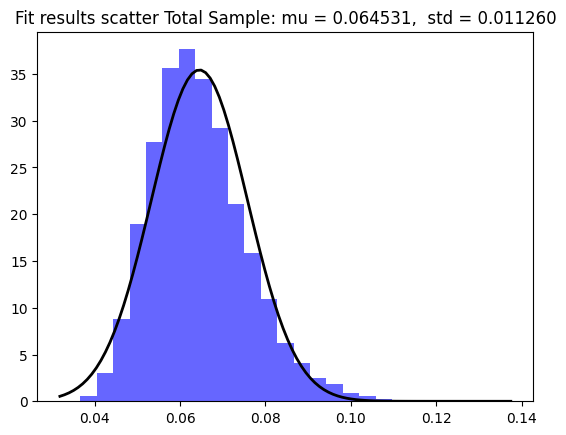

In [409]:
total_sample_data.slope_mu, total_sample_data.slope_std = norm.fit(total_sample_slope_flux_alpha)
# Plot the histogram.
plt.hist(total_sample_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.slope_mu, total_sample_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")
title = "Fit results slope Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.slope_mu, total_sample_data.slope_std)
plt.title(title)
plt.legend()
plt.show()

total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std = norm.fit(total_sample_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(total_sample_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.title(title)
plt.show()

total_sample_data.scatter_mu, total_sample_data.scatter_std = norm.fit(scatter_total_sample)
# Plot the histogram.
plt.hist(scatter_total_sample, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.scatter_mu, total_sample_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.scatter_mu, total_sample_data.scatter_std)
plt.title(title)
plt.show()

### Upper-Sco

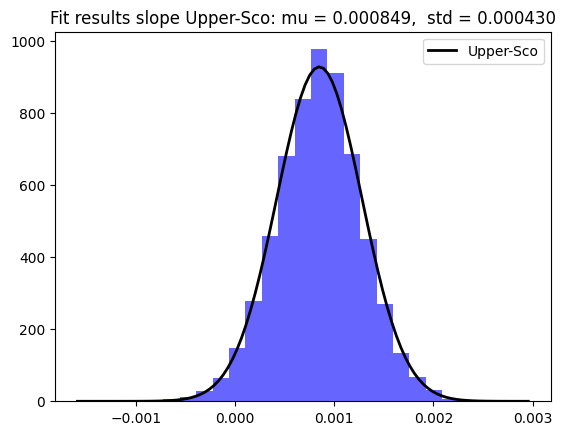

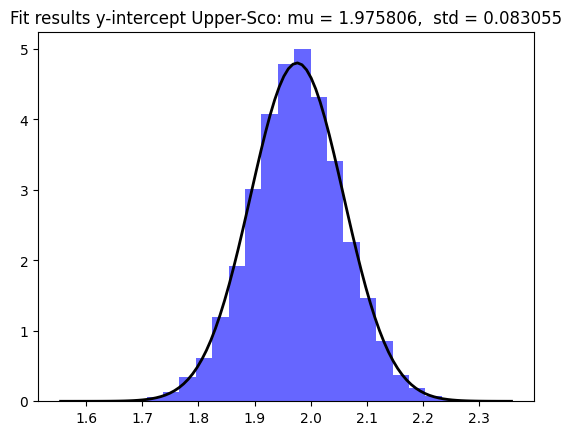

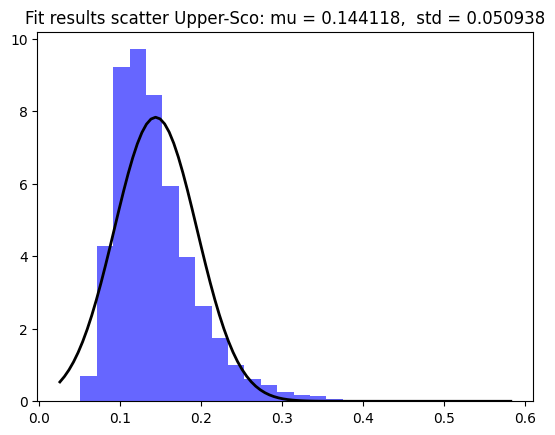

In [410]:
upper_sco_data.slope_mu, upper_sco_data.slope_std = norm.fit(upper_sco_slope_flux_alpha)
# Plot the histogram.
plt.hist(upper_sco_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco")
title = "Fit results slope Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.title(title)
plt.legend()
plt.show()

upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std = norm.fit(upper_sco_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(upper_sco_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.title(title)
plt.show()

upper_sco_data.scatter_mu, upper_sco_data.scatter_std = norm.fit(scatter_upper_sco)
# Plot the histogram.
plt.hist(scatter_upper_sco, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.scatter_mu, upper_sco_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.scatter_mu, upper_sco_data.scatter_std)
plt.title(title)
plt.show()

In [411]:
print(u"Lupus slope mean: %.5f \u00B1 %.5f "
      "\nOphiucus slope mean: %.5f \u00B1 %.5f"
      "\nTaurus slope mean: %.5f \u00B1 %.5f"
      "\nTotal Sample slope mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco slope mean: %.5f \u00B1 %.5f"
      % (lupus_data.slope_mu, lupus_data.slope_std,
         ophiucus_data.slope_mu,ophiucus_data.slope_std,
         taurus_data.slope_mu, taurus_data.slope_std,
         total_sample_data.slope_mu, total_sample_data.slope_std,
         upper_sco_data.slope_mu, upper_sco_data.slope_std))

Lupus slope mean: 0.00175 ± 0.00053 
Ophiucus slope mean: 0.00024 ± 0.00046
Taurus slope mean: 0.00113 ± 0.00035
Total Sample slope mean: 0.00070 ± 0.00021
Upper-Sco slope mean: 0.00085 ± 0.00043


In [412]:
print(u"Lupus y-intercept mean: %.5f \u00B1 %.5f"
      "\nOphiucus y-intercept mean: %.5f \u00B1 %.5f"
      "\nTaurus y-intercept mean: %.5f\u00B1 %.5f"
      "\nTotal Sample y-intercept mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco y-intercept mean: %.5f \u00B1 %.5f"
      % (lupus_data.y_intercept_mu, lupus_data.y_intercept_std,
         ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std,
         taurus_data.y_intercept_mu, taurus_data.y_intercept_std,
         total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std,
         upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std))

Lupus y-intercept mean: 2.10121 ± 0.05725
Ophiucus y-intercept mean: 2.18314 ± 0.13272
Taurus y-intercept mean: 2.11829± 0.07447
Total Sample y-intercept mean: 2.15703 ± 0.04118
Upper-Sco y-intercept mean: 1.97581 ± 0.08305


In [413]:
print(u"Lupus scatter mean: %.5f \u00B1 %.5f "
      "\nOphiucus scatter mean: %.5f \u00B1 %.5f"
      "\nTaurus scatter mean: %.5f \u00B1 %.5f"
      "\nTotal scatter slope mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco scatter mean: %.5f \u00B1 %.5f"
      % (lupus_scatter_mu, lupus_scatter_std,
         ophiucus_data.scatter_mu, ophiucus_data.scatter_std,
         taurus_data.scatter_mu, taurus_data.scatter_std,
         total_sample_data.scatter_mu, total_sample_data.scatter_std,
         upper_sco_data.scatter_mu, upper_sco_data.scatter_std))

Lupus scatter mean: 0.06465 ± 0.01751 
Ophiucus scatter mean: 0.11573 ± 0.05357
Taurus scatter mean: 0.04119 ± 0.01636
Total scatter slope mean: 0.06453 ± 0.01126
Upper-Sco scatter mean: 0.14412 ± 0.05094


In [414]:
from tabulate import tabulate
first_row = ["Region", "Slope mean", "Slope std", "Y-Intercept mean", "Y-Intercept std", "scatter mean", "scatter std"]
table = [["Upper-Sco", upper_sco_data.slope_mu, upper_sco_data.slope_std, upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std, upper_sco_data.scatter_mu, upper_sco_data.scatter_std],
         ["Lupus", lupus_data.slope_mu, lupus_data.slope_std, lupus_y_intercept_mu, lupus_y_intercept_std, lupus_scatter_mu, lupus_scatter_std],
         ["Taurus", taurus_data.slope_mu, taurus_data.slope_std, taurus_data.y_intercept_mu, taurus_data.y_intercept_std, taurus_data.scatter_mu, taurus_data.scatter_std],
         ["Ophiucus", ophiucus_data.slope_mu, ophiucus_data.slope_std, ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std, ophiucus_data.scatter_mu, ophiucus_data.scatter_std],
         ["Lupus + Taurus + Ophiucus", total_sample_data.slope_mu, total_sample_data.slope_std, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std, total_sample_data.scatter_mu, total_sample_data.scatter_std]]
print(tabulate(table, headers = first_row))

Region                       Slope mean    Slope std    Y-Intercept mean    Y-Intercept std    scatter mean    scatter std
-------------------------  ------------  -----------  ------------------  -----------------  --------------  -------------
Upper-Sco                   0.000848662  0.000430207             1.97581          0.0830548       0.144118       0.0509378
Lupus                       0.00174731   0.000534513             2.10085          0.0574341       0.0646477      0.0175117
Taurus                      0.00112541   0.00035061              2.11829          0.074465        0.0411949      0.0163555
Ophiucus                    0.000237259  0.000458642             2.18314          0.132721        0.115731       0.053569
Lupus + Taurus + Ophiucus   0.000696529  0.000211635             2.15703          0.0411769       0.064531       0.0112605


/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_27452/3281736770.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color="g", label="Lupus")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_27452/3281736770.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_27452/3281736770.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Ophiucus", color="r")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/

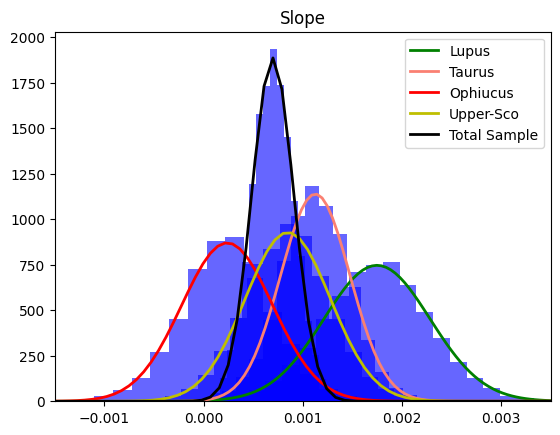

In [415]:
# Plot the histogram.
plt.hist(lupus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.slope_mu, lupus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, color="g", label="Lupus")


# Plot the histogram.
plt.hist(taurus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.slope_mu, taurus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")


# Plot the histogram.
plt.hist(ophiucus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Ophiucus", color="r")


# Plot the histogram.
plt.hist(upper_sco_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco", color="y")


# Plot the histogram.
plt.hist(total_sample_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.slope_mu, total_sample_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")


plt.xlim(-0.0015, 0.0035)
plt.title("Slope")
plt.legend()

/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_27452/1022221931.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Lupus", color="g")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_27452/1022221931.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_27452/1022221931.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color="r")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_27452/

Text(0.5, 1.0, 'Y-Intercept')

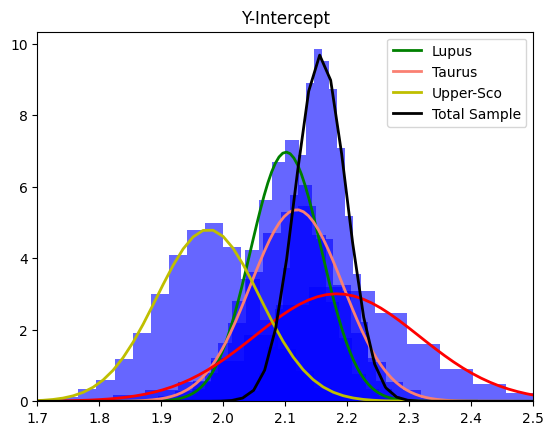

In [416]:
# Plot the histogram.
plt.hist(lupus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Lupus", color="g")


# Plot the histogram.
plt.hist(taurus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")


# Plot the histogram.
plt.hist(ophiucus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, color="r")


# Plot the histogram.
plt.hist(upper_sco_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco", color="y")


# Plot the histogram.
plt.hist(total_sample_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")

plt.xlim(1.6, 2.6)
plt.legend()

plt.xlim(1.7, 2.5)
plt.title("Y-Intercept")

In [417]:
#ks test
# assume scatter = 0, calculate spectral_index for upper-sco from function of total sample
# repeat by changing alpha, beta and scatter
# using montecarlo simulation random values for alpha, beta and scatter will be taken
# note that while alpha and beta will be constant for each rune, scatter will not
# I have to randomly assign a spread for the scatter for every run
# for every element calculated in every run, scatter will ahev to change and be withing the standard deviation

# the run ks 2 sample test on observed vs calculated and store the values

## Take random values from Gaussian

In [488]:
calculated_spectra_indices_upper_sco = []
calculated_spectra_indices_lupus = []

def spectral_index_function(alpha, beta, scatter, x):
    return alpha + beta * x - scatter

def loop_spectra_index(slope_mu, slope_std, y_intercept_mu, y_intercept_std, scatter_mu, scatter_std, flux):
    beta = random.gauss(slope_mu, slope_std)
    alpha = random.gauss(y_intercept_mu, y_intercept_std)
    subset = []
    for x in range(len(flux)):
        new_scatter_std = random.gauss(scatter_mu, scatter_std)
        scatter = random.gauss(scatter_mu, scatter_mu - new_scatter_std)
        subset.append(spectral_index_function(alpha, beta, scatter, flux[x]))

    return subset

for i in range(1000):
    calculated_spectra_indices_upper_sco.append(loop_spectra_index(upper_sco.slope_mu, upper_sco.slope_std,upper_sco.y_intercept_mu, upper_sco.y_intercept_std,
    upper_sco.scatter_mu, upper_sco.scatter_std,
    flux_barenfeld_0_88mm_updated))

    calculated_spectra_indices_lupus.append(loop_spectra_index(lupus_slope_mu, lupus_slope_std, lupus_y_intercept_mu, lupus_y_intercept_std, lupus_scatter_mu, lupus_scatter_std, flux_lupus_1_mm))

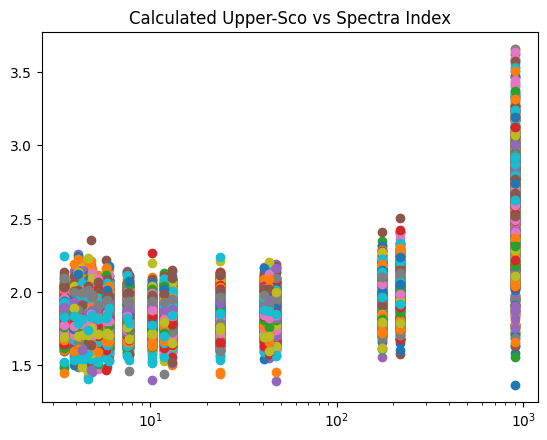

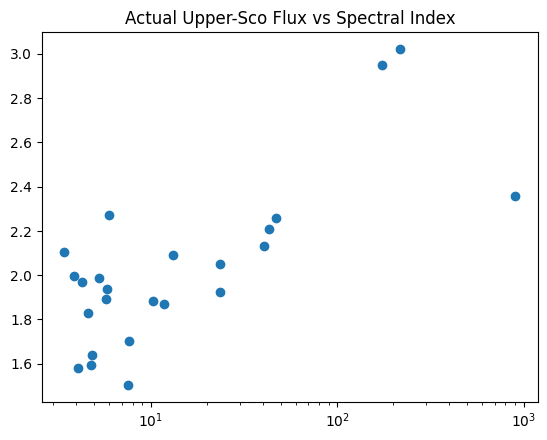

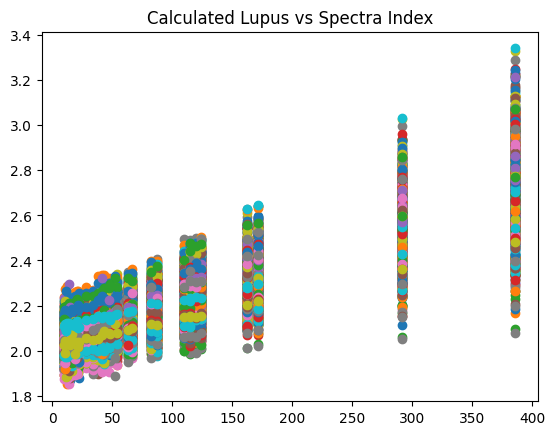

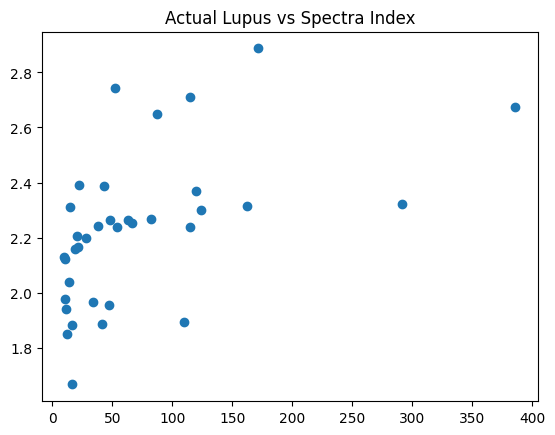

In [489]:
ks_2sample_upper_sco = []
for i in range(len(calculated_spectra_indices_upper_sco)):
    ks_2sample_upper_sco.append(ks_2samp(spectral_index_upper_sco, calculated_spectra_indices_upper_sco[i]))
    plt.scatter(flux_barenfeld_0_88mm_updated, calculated_spectra_indices_upper_sco[i])

plt.xscale('log')
plt.title("Calculated Upper-Sco vs Spectra Index")
plt.show()

plt.scatter(flux_barenfeld_0_88mm_updated, spectral_index_upper_sco)
plt.title("Actual Upper-Sco Flux vs Spectral Index")
plt.xscale('log')
plt.show()


for i in range(len(calculated_spectra_indices_lupus)):
    plt.scatter(flux_lupus_1_mm, calculated_spectra_indices_lupus[i])

plt.title("Calculated Lupus vs Spectra Index")
plt.show()

plt.scatter(flux_lupus_1_mm, tazzari_lupus_spectral_indices)
plt.title("Actual Lupus vs Spectra Index")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


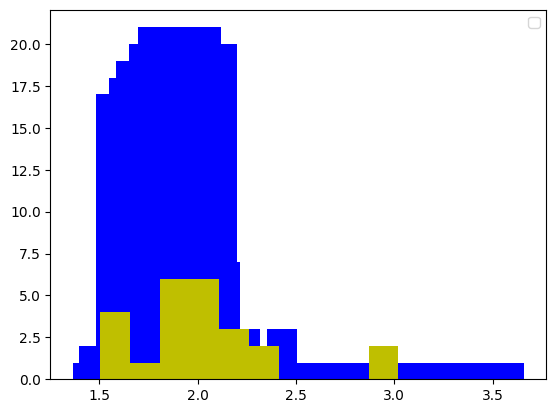

In [497]:


for i in range(len(calculated_spectra_indices_upper_sco)):
    mu_calculated, std_calculated = norm.fit(calculated_spectra_indices_upper_sco[i])

    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu_calculated, std_calculated)
    #plt.plot(x, p, linewidth=2, color='b')
    plt.hist(calculated_spectra_indices_upper_sco[i], color='b')

mu_measured, std_measured = norm.fit(spectral_index_upper_sco)

x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_measured, std_measured)
#plt.plot(x, p, linewidth=2, label='Measured', color='y')
plt.hist(spectral_index_upper_sco, color='y')

plt.legend()